In [21]:
from sklearn.cluster import KMeans
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('hwk09.csv')
crimeData = pd.read_csv('crimeData.csv')
colormap = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'c', 5: 'm', 6: 'k'}

# K-Means Sklearn

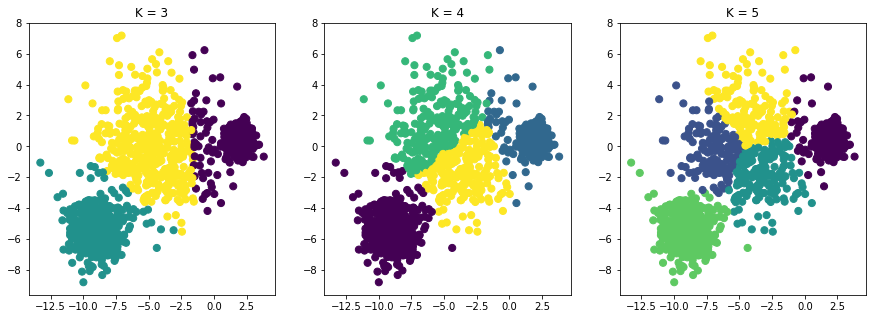

In [22]:
i=0
plt.figure(figsize=(15,5))
while i < 3:
    kmeans = KMeans(n_clusters=3+i).fit(data)
    y_kmeans = kmeans.predict(data)
    plt.subplot(131+i)
    plt.title("K = %s" % (i+3))
    plt.scatter(data['x'], data['y'], c=y_kmeans, s=50, cmap='viridis')
    i = i+1

# K-Means Implementation

              x         y  distanceFrom0  distanceFrom1  distanceFrom2  \
0     -6.111197  1.471531       6.069876       7.337441       5.447397   
1     -7.496654  0.913425       4.595049       6.034499       5.961106   
2    -10.844898 -7.553523       7.641333       3.556906       9.070667   
3     -4.543377 -2.135686       7.756441       6.720390       1.768913   
4     -1.913821 -0.034780      10.086239       9.913709       3.157897   
5      1.771335  0.634508      13.785945      13.586231       5.997940   
6     -9.751574 -5.203026       5.668060       1.733736       7.101906   
7    -11.510236 -4.162843       4.191555       0.535592       8.589315   
8     -7.726758 -5.866566       7.257905       3.768047       5.528059   
9      2.307661  1.901932      14.433520      14.557700       7.224971   
10     3.359375  0.090352      15.359641      14.930594       7.070497   
11     1.508273  0.127570      13.508876      13.171702       5.486913   
12    -8.555451 -5.035368       6.1008

              x         y  distanceFrom0  distanceFrom1  distanceFrom2  \
0     -6.111197  1.471531       0.656213       7.399189       7.892467   
1     -7.496654  0.913425       1.928270       6.444607       9.229663   
2    -10.844898 -7.553523      10.123395       2.904605      14.945769   
3     -4.543377 -2.135686       3.388076       5.449670       6.812409   
4     -1.913821 -0.034780       3.831865       8.813872       3.682762   
5      1.771335  0.634508       7.362080      12.270397       0.112720   
6     -9.751574 -5.203026       7.552844       0.838720      12.829709   
7    -11.510236 -4.162843       7.925355       2.848945      14.043262   
8     -7.726758 -5.866566       7.282246       1.301378      11.413837   
9      2.307661  1.901932       7.925832      13.384886       1.488924   
10     3.359375  0.090352       8.991806      13.447419       1.692809   
11     1.508273  0.127570       7.150058      11.797081       0.458630   
12    -8.555451 -5.035368       6.8122

              x         y  distanceFrom0  distanceFrom1  distanceFrom2  \
0     -6.111197  1.471531       0.391491       7.398028       7.929525   
1     -7.496654  0.913425       1.803875       6.444945       9.266142   
2    -10.844898 -7.553523      10.250706       2.908610      14.970523   
3     -4.543377 -2.135686       3.674682       5.444045       6.841582   
4     -1.913821 -0.034780       4.067992       8.808351       3.716846   
5      1.771335  0.634508       7.547497      12.263942       0.113641   
6     -9.751574 -5.203026       7.671049       0.847719      12.857366   
7    -11.510236 -4.162843       7.969399       2.857822      14.073810   
8     -7.726758 -5.866566       7.472160       1.292439      11.437930   
9      2.307661  1.901932       8.070765      13.378840       1.484829   
10     3.359375  0.090352       9.187766      13.440405       1.655275   
11     1.508273  0.127570       7.351873      11.790461       0.467982   
12    -8.555451 -5.035368       6.9657

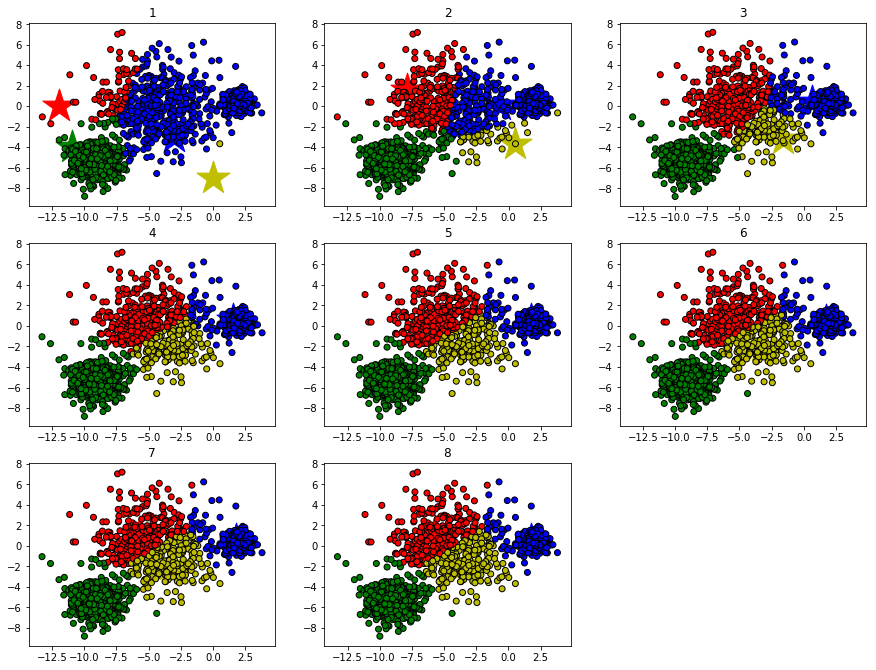

In [27]:
################################################
# update                                      
#   -This function updates centroid locations 
#  Params                                     
#    cen   - List of centroids to update    
#    df    - Dataframe of dataset
#    attr1 - First attribute being used
#    attr2 - Second attribute being used
#  Return
#    cen   - Updated list of centroids      
###############################################
def update(cen, df, attr1, attr2):
    for k in cen.keys():
        cen[k][0] = np.mean(df[df['closest'] == k][attr1])
        cen[k][1] = np.mean(df[df['closest'] == k][attr2])
    return cen

################################################
# assign                                      
#   -This function measures the distance and 
#    assigns every point to a cluster. It also
#    assigns color based on cluster for graph
#  Params                                     
#    centroids - List of centroids
#    df        - Dataframe of dataset
#    attr1     - First attribute being used
#    attr2     - Second attribute being used
#  Return
#    cen       - Updated dataframe      
###############################################
def assign(df, centroids, attr1, attr2):
    for i in centroids.keys():
        df['distanceFrom{}'.format(i)] = (np.sqrt((df[attr1] - centroids[i][0]) ** 2 + (df[attr2] - centroids[i][1]) ** 2))
    centroidDistanceCols = ['distanceFrom{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroidDistanceCols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distanceFrom')))
    df['color'] = df['closest'].map(lambda x: colormap[x])
    print (df)
    return df
  
################################################
# km                                      
#   -This function is the one that initializes
#    the k-means algorithm. 
#  Params                                     
#    numClusters - Number of clusters to look for    
#    data        - Dataframe of dataset
#    attr1       - First attribute being used
#    attr2       - Second attribute being used
#  Return
#    None      
###############################################
def km(numClusters, data, attr1, attr2):
    centroids = {}
    for i in range(numClusters):
        centroids[i] = [np.random.randint(min(data[attr1]), max(data[attr1])), np.random.randint(min(data[attr2]), max(data[attr2]))]
    
    fig = plt.figure(figsize=(15,60))
    df = assign(data, centroids, attr1, attr2)
        
    steps = 0
    while True:
        steps += 1
        plt.subplot(15,3,steps)
        plt.title(str(steps))
        for i in centroids.keys():
            plt.scatter(*centroids[i], color=colormap[i], s=1220, marker='*')
        plt.scatter(df[attr1], df[attr2], color=df['color'], alpha=1, edgecolor='k')
        closestCentroids = df['closest'].copy(deep=True)
        centroids = update(centroids, df, attr1, attr2)
        df = assign(df, centroids, attr1, attr2)
        if closestCentroids.equals(df['closest']):
            break
     
    print(steps)
    plt.show
    
km(4, data, 'x', 'y')

# Crime Data Clustering

4


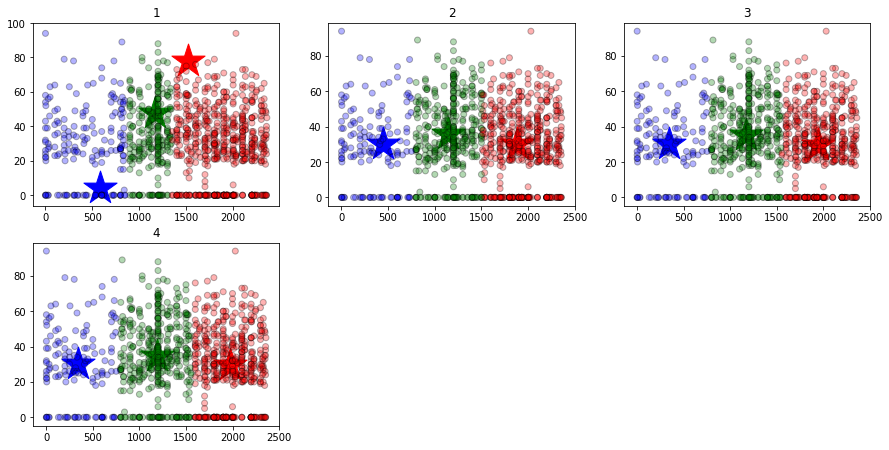

In [11]:
km(3, crimeData, 'Time Occurred', 'Victim Age')